In [3]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
missing_values = ['']
df = pd.read_csv('fda_project2_data.csv', na_values = missing_values)
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 541909 rows and 8 columns.


In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
print(df.dtypes)
print(df.columns)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [8]:
#Data Cleaning

df = df.loc[~df.Description.isnull()]
df = df.fillna('NA')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.loc[df.UnitPrice > 0]
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns after data cleaning")
print(df.describe())

The dataset has 539392 rows and 8 columns after data cleaning
            Quantity      UnitPrice
count  539392.000000  539392.000000
mean        9.845904       4.673648
std       215.412652      94.614722
min    -80995.000000       0.001000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000


1) The first column is the InvoiceNo. It is unique to an order and an order can have multiple items with in it. InvoiceNo starts with a 'C' if it is a cancelled order.

2) The second column is StockCode. It is unique to an item and is alphanumeric.

3) The third column is Description. It gives a description of each item in an order.

4) The fourth column is Quantity. It is the amount of any given item that's present in an order.

5) The fifth column is InvoiceDate. It is the datetime value of when an order was created.

6) The sixth column is UnitPrice. It is the price of any given item in an order.

7) The seventh column is CustomerID. It is unique to a customer and helps in identifying who placed any given order.

8) The eighth column is Country. It gives the information about where the order was placed.

In [251]:
print(f"The dataset covers a time period from {df.InvoiceDate.min()} to {df.InvoiceDate.max()}")
print(f"There are {len(df['CustomerID'].unique())} unique customers in the dataset")

The dataset covers a time period from 2010-12-01 08:26:00 to 2011-12-09 12:50:00
There are 4372 unique customers in the dataset


In [252]:
df_co = df.groupby('CustomerID')['InvoiceNo'].nunique()
df_co = df_co.reset_index().rename(columns = {'InvoiceNo' : 'Orders'})

In [253]:
df_co

,CustomerID,Orders
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18281.0,1
4368,18282.0,3
4369,18283.0,16
4370,18287.0,3


In [254]:
print(f"Customer Churn% is {len(df_co.loc[df_co.Orders <= 1])/len(df_co.loc[df_co.CustomerID != 'NA'])*100:.2f}%")

Customer Churn% is 30.02%


In [255]:
len(df_co.loc[df_co.Orders <= 1])

1312

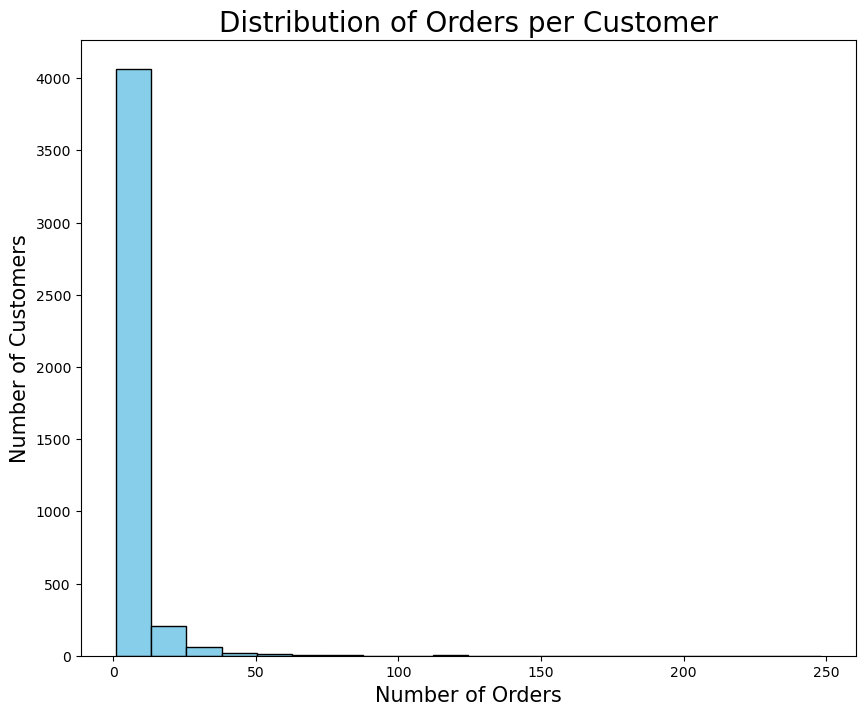

In [256]:
plt.figure(figsize = (10,8))
plt.hist(df_co.loc[df_co.CustomerID != 'NA']['Orders'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Orders per Customer', fontsize=20)
plt.xlabel('Number of Orders', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.show()

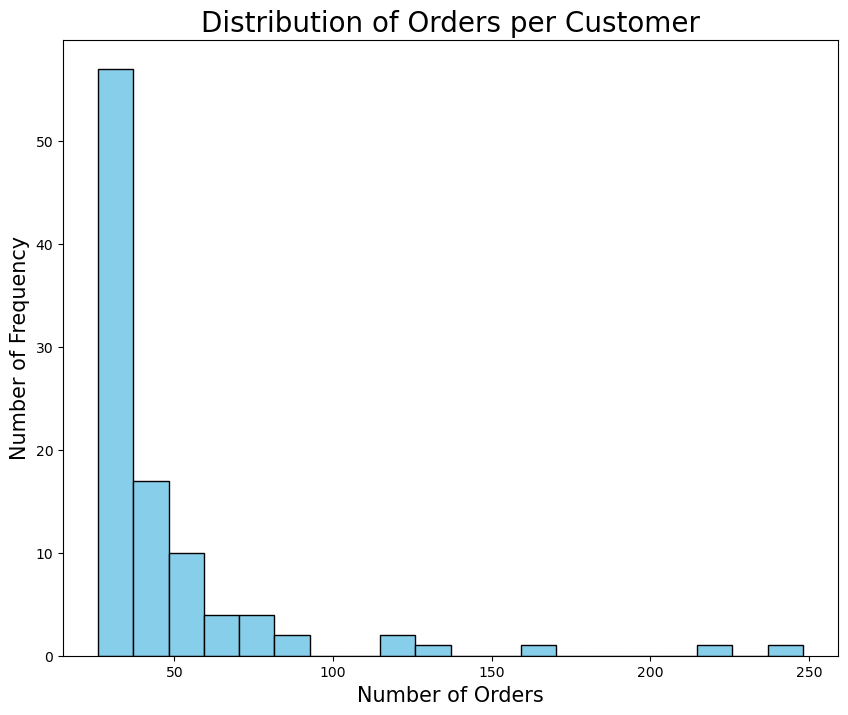

In [257]:
plt.figure(figsize = (10,8))
plt.hist(df_co.loc[(df_co.CustomerID != 'NA')&(df_co.Orders >25)]['Orders'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Orders per Customer', fontsize=20)
plt.xlabel('Number of Orders', fontsize=15)
plt.ylabel('Number of Frequency', fontsize=15)
plt.show()

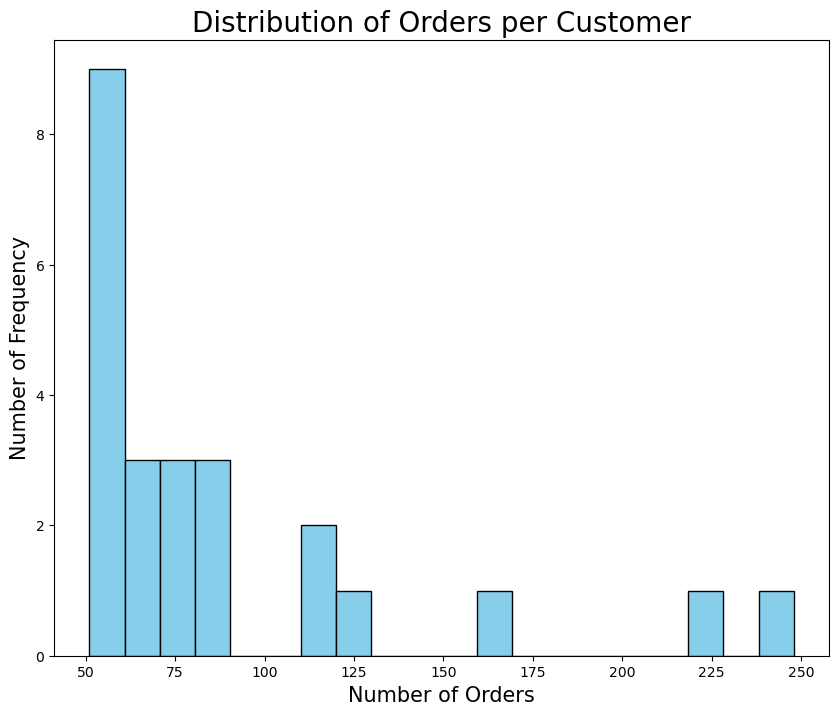

In [258]:
plt.figure(figsize = (10,8))
plt.hist(df_co.loc[(df_co.CustomerID != 'NA')&(df_co.Orders >50)]['Orders'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Orders per Customer', fontsize=20)
plt.xlabel('Number of Orders', fontsize=15)
plt.ylabel('Number of Frequency', fontsize=15)
plt.show()

In [10]:
df_top5c = df_co.loc[df_co.CustomerID != 'NA'].sort_values(by = 'Orders', ascending = False)[:5]
df_top5c

NameError: name 'df_co' is not defined

In [260]:
df_top10p = df['Description'].value_counts()[:10]
df_top10p

WHITE HANGING HEART T-LIGHT HOLDER    2365
REGENCY CAKESTAND 3 TIER              2198
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1726
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64

In [261]:
df_avgp = df.loc[df.Quantity > 0].groupby('Description')['UnitPrice'].mean()
df_avgp

Description
 4 PURPLE FLOCK DINNER CANDLES       2.455366
 50'S CHRISTMAS GIFT BAG LARGE       1.426589
 DOLLY GIRL BEAKER                   1.502123
 I LOVE LONDON MINI BACKPACK         4.611364
 I LOVE LONDON MINI RUCKSACK         4.150000
                                      ...    
ZINC T-LIGHT HOLDER STARS SMALL      0.943673
ZINC TOP  2 DOOR WOODEN SHELF       21.094167
ZINC WILLIE WINKIE  CANDLE STICK     1.089963
ZINC WIRE KITCHEN ORGANISER          9.929375
ZINC WIRE SWEETHEART LETTER TRAY     3.976522
Name: UnitPrice, Length: 4026, dtype: float64

In [262]:
df['Revenue'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [263]:
df_rev = df.groupby('Description')['Revenue'].sum()
df_rev = df_rev.reset_index().sort_values(by = 'Revenue', ascending = False)
df_top10r = df_rev[:10]
df_top10r

,Description,Revenue
1074,DOTCOM POSTAGE,206245.48
2864,REGENCY CAKESTAND 3 TIER,164762.19
3859,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
2422,PARTY BUNTING,98302.98
1825,JUMBO BAG RED RETROSPOT,92356.03
2752,RABBIT NIGHT LIGHT,66756.59
2703,POSTAGE,66230.64
2390,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
228,ASSORTED COLOUR BIRD ORNAMENT,58959.73
751,CHILLI LIGHTS,53768.06


In [264]:
df['year']=df['InvoiceDate'].dt.year
df['month']=df['InvoiceDate'].dt.strftime('%b')
df['month_num'] = df['InvoiceDate'].dt.month
df['day']=df['InvoiceDate'].dt.day
df['weekday']=df['InvoiceDate'].dt.strftime('%A')
df['weekday_num'] = df['InvoiceDate'].dt.strftime('%w')

In [265]:
df_wdo = df.loc[df.Quantity > 0].groupby(['weekday','weekday_num'])['InvoiceNo'].nunique()
df_wdo = df_wdo.reset_index().rename(columns = {'InvoiceNo' : 'Orders'}).sort_values(by = 'weekday_num')
del df_wdo['weekday_num']
df_wdo

,weekday,Orders
2,Sunday,2204
1,Monday,3126
4,Tuesday,3554
5,Wednesday,3690
3,Thursday,4246
0,Friday,3140


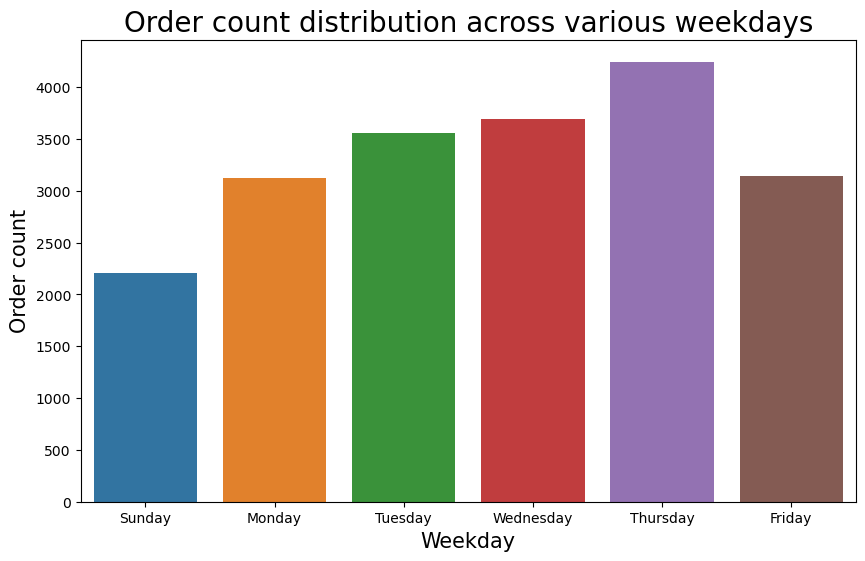

In [266]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'weekday', y = 'Orders', data = df_wdo)
plt.title('Order count distribution across various weekdays', fontsize = 20)
plt.xlabel('Weekday', fontsize = 15)
plt.ylabel('Order count', fontsize = 15)
plt.show()

In [267]:
df['time'] = df['InvoiceDate'].dt.strftime('%H:%M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,year,month,month_num,day,weekday,weekday_num,time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,Dec,12,1,Wednesday,3,08:26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,Dec,12,1,Wednesday,3,08:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,Dec,12,1,Wednesday,3,08:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,Dec,12,1,Wednesday,3,08:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,Dec,12,1,Wednesday,3,08:26


In [268]:
def time_bin(x) :
    if x.time() < datetime.time(2) :
        return '00:00-02:00'
    elif x.time() < datetime.time(4) :
        return '02:00-04:00'
    elif x.time() < datetime.time(6) : 
        return '04:00-06:00'
    elif x.time() < datetime.time(8) :
        return '06:00-08:00'
    elif x.time() < datetime.time(10) :
        return '08:00-10:00'
    elif x.time() < datetime.time(12) :
        return '10:00-12:00'
    elif x.time() < datetime.time(14) :
        return '12:00-14:00'
    elif x.time() < datetime.time(16) :
        return '14:00-16:00'
    elif x.time() < datetime.time(18) :
        return '16:00-18:00'
    elif x.time() < datetime.time(20) :
        return '18:00-20:00'
    elif x.time() < datetime.time(22) :
        return '20:00-22:00'
    else :
        return '22:00-00:00'

In [269]:
df['time_bin'] = df['InvoiceDate'].apply(time_bin)
df[['InvoiceDate','time_bin']]

,InvoiceDate,time_bin
0,2010-12-01 08:26:00,08:00-10:00
1,2010-12-01 08:26:00,08:00-10:00
2,2010-12-01 08:26:00,08:00-10:00
3,2010-12-01 08:26:00,08:00-10:00
4,2010-12-01 08:26:00,08:00-10:00
...,...,...
541904,2011-12-09 12:50:00,12:00-14:00
541905,2011-12-09 12:50:00,12:00-14:00
541906,2011-12-09 12:50:00,12:00-14:00
541907,2011-12-09 12:50:00,12:00-14:00


In [270]:
df_time = df.loc[df.Quantity > 0].groupby('time_bin')['InvoiceNo'].nunique()
df_time = df_time.reset_index().rename(columns = {'InvoiceNo' : 'Orders'})
df_time

,time_bin,Orders
0,06:00-08:00,30
1,08:00-10:00,2050
2,10:00-12:00,4757
3,12:00-14:00,5973
4,14:00-16:00,4793
5,16:00-18:00,2002
6,18:00-20:00,338
7,20:00-22:00,18


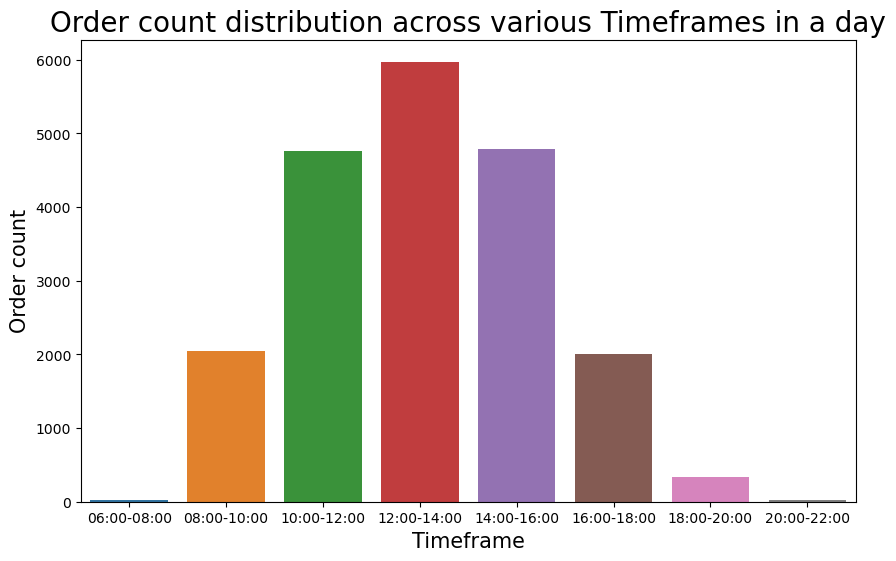

In [271]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'time_bin', y = 'Orders', data = df_time)
plt.title('Order count distribution across various Timeframes in a day', fontsize = 20)
plt.xlabel('Timeframe', fontsize = 15)
plt.ylabel('Order count', fontsize = 15)
plt.show()

In [272]:
df_month = df.loc[df.Quantity > 0].groupby(['month','month_num'])['InvoiceNo'].nunique()
df_month = df_month.reset_index().rename(columns = {'InvoiceNo' : 'Orders'}).sort_values(by = 'month_num')
del df_month['month_num']
df_month

,month,Orders
4,Jan,1086
3,Feb,1100
7,Mar,1454
0,Apr,1246
8,May,1681
6,Jun,1533
5,Jul,1475
1,Aug,1361
11,Sep,1837
10,Oct,2040


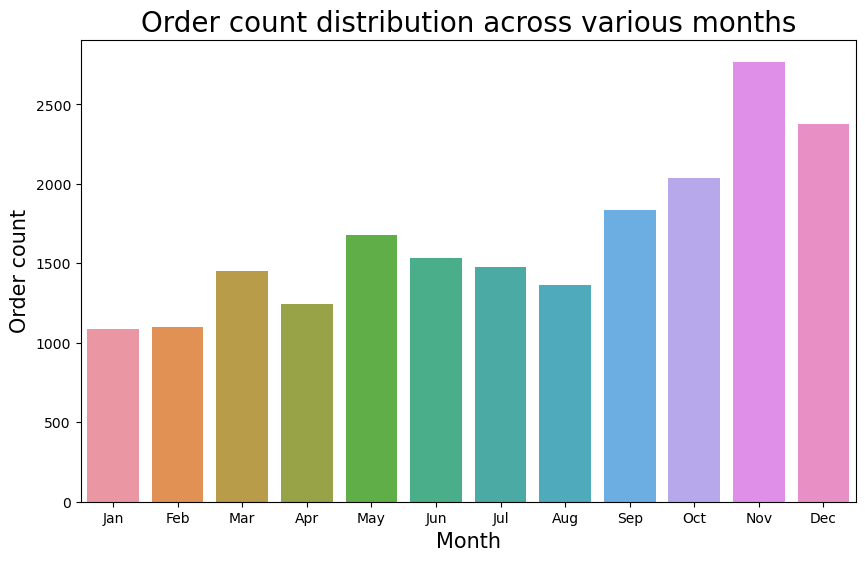

In [273]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'month', y = 'Orders', data = df_month)
plt.title('Order count distribution across various months', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Order count', fontsize = 15)
plt.show()

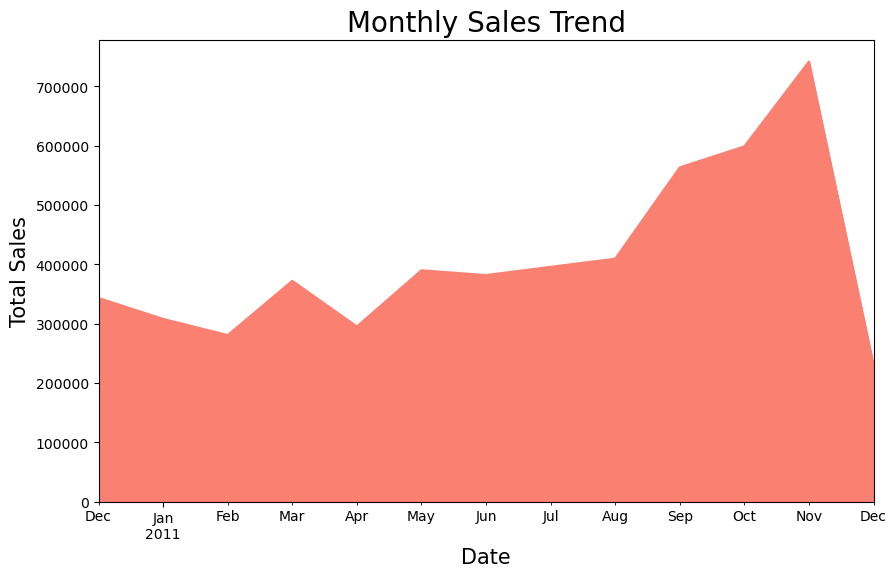

In [274]:
monthly_sales = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Quantity'].sum()
plt.figure(figsize = (10,6))
monthly_sales.plot(kind='area', stacked=True, color = 'Salmon')

plt.title('Monthly Sales Trend', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Total Sales', fontsize = 15)

plt.show()

In [275]:
df_top5_countries = df.loc[df.Quantity > 0].groupby(['Country'])['InvoiceNo'].nunique()
df_top5_countries = df_top5_countries.reset_index().rename(columns = {'InvoiceNo' : 'Orders'}).sort_values(by = 'Orders', ascending = False)[:5]
df_top5_countries

,Country,Orders
36,United Kingdom,18019
14,Germany,457
13,France,392
10,EIRE,288
3,Belgium,98


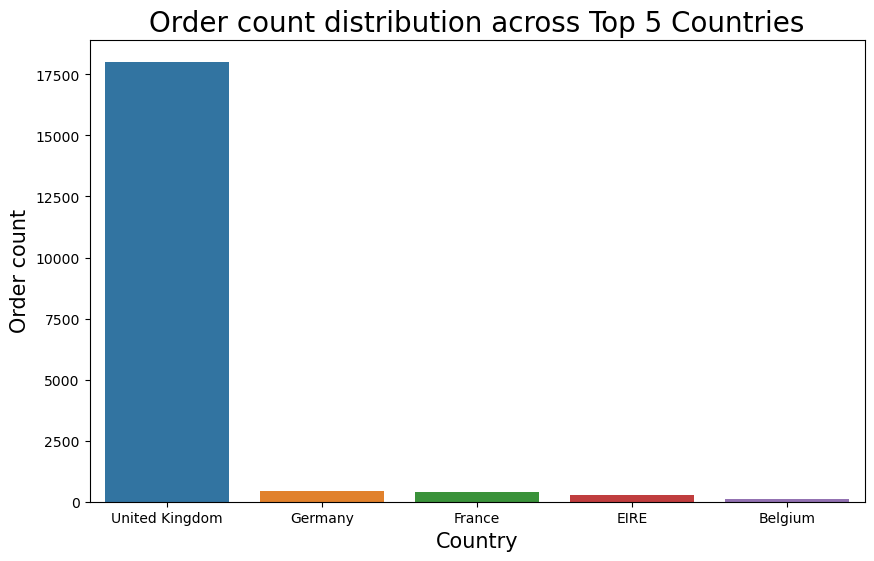

In [276]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Country', y = 'Orders', data = df_top5_countries)
plt.title('Order count distribution across Top 5 Countries', fontsize = 20)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Order count', fontsize = 15)
plt.show()

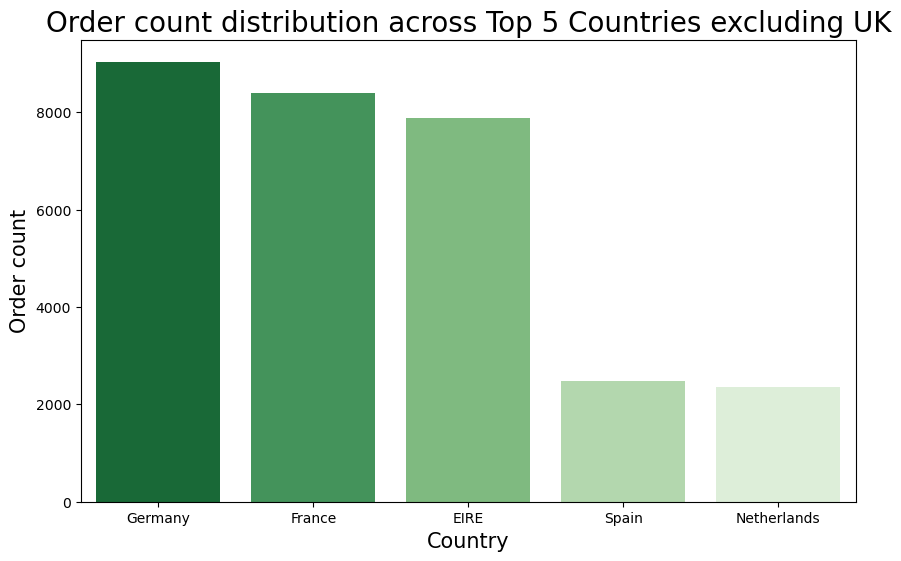

In [277]:
df_top5_countries2 = df.loc[df.Quantity > 0]['Country'].value_counts()[1:6]
df_top5_countries2 = df_top5_countries2.reset_index().rename(columns = {'Country' : 'Orders','index' : 'Country'})
df_top5_countries2

plt.figure(figsize = (10,6))
sns.barplot(x = 'Country', y = 'Orders', data = df_top5_countries2, palette="Greens_r")
plt.title('Order count distribution across Top 5 Countries excluding UK', fontsize = 20)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Order count', fontsize = 15)
plt.show()

In [278]:
df_avg_ov = df.loc[df.CustomerID != 'NA'].groupby(['CustomerID','InvoiceNo','Country'])['Revenue'].sum()
df_avg_ov = df_avg_ov.reset_index()

In [279]:
df_avg_ov = df_avg_ov.loc[df_avg_ov.CustomerID.isin(df_co.loc[(df_co.CustomerID != 'NA')&(df_co.Orders >= 5)]['CustomerID'])]
df_avg_ov = df_avg_ov.groupby(['CustomerID','Country'])['Revenue'].mean()
df_avg_ov = df_avg_ov.reset_index().rename(columns = {'Revenue' : 'Avg_order_value'})
df_avg_ov

,CustomerID,Country,Avg_order_value
0,12347.0,Iceland,615.714286
1,12352.0,Norway,140.491818
2,12359.0,Cyprus,1040.921667
3,12362.0,Belgium,396.506154
4,12380.0,Belgium,544.112000
...,...,...,...
1373,18245.0,United Kingdom,313.445000
1374,18257.0,United Kingdom,188.781667
1375,18260.0,United Kingdom,324.375000
1376,18272.0,United Kingdom,437.825714


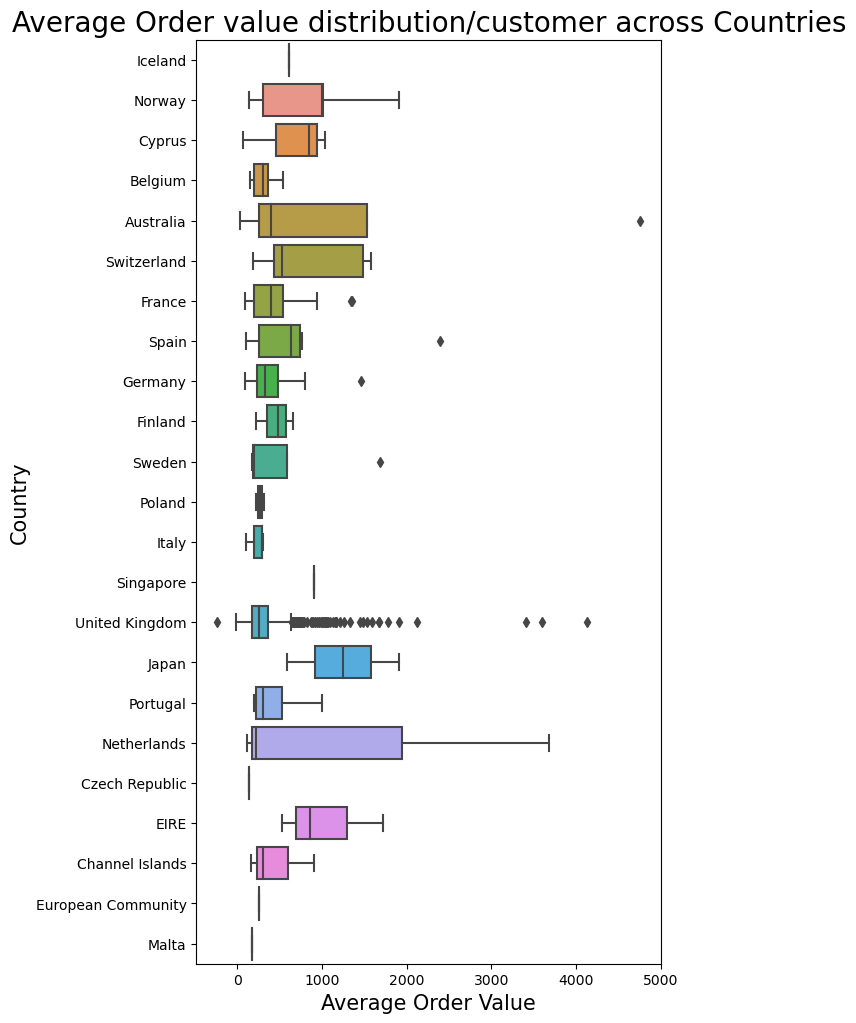

In [280]:
plt.figure(figsize = (6,12))
sns.boxplot(data = df_avg_ov, x = 'Avg_order_value', y = 'Country')
plt.title('Average Order value distribution/customer across Countries', fontsize = 20)
plt.xlabel('Average Order Value', fontsize = 15)
plt.ylabel('Country', fontsize = 15)
plt.show()

In [281]:
def first_order(cust_id) :
    return df.loc[df.CustomerID == cust_id]['InvoiceDate'].min()
def last_order(cust_id) :
    return df.loc[df.CustomerID == cust_id]['InvoiceDate'].max()

In [282]:
df_cust = df[['CustomerID']].loc[df.CustomerID != 'NA'].drop_duplicates()
df_cust['First_order_date'] = df_cust['CustomerID'].apply(first_order)
df_cust['Last_order_date'] = df_cust['CustomerID'].apply(last_order)

In [283]:
df_cust

,CustomerID,First_order_date,Last_order_date
0,17850.0,2010-12-01 08:26:00,2011-02-10 14:38:00
9,13047.0,2010-12-01 08:34:00,2011-11-08 12:10:00
26,12583.0,2010-12-01 08:45:00,2011-12-07 08:07:00
46,13748.0,2010-12-01 09:00:00,2011-09-05 09:45:00
65,15100.0,2010-12-01 09:09:00,2011-01-13 17:09:00
...,...,...,...
536969,13436.0,2011-12-08 10:33:00,2011-12-08 10:33:00
537255,15520.0,2011-12-08 10:58:00,2011-12-08 10:58:00
538064,13298.0,2011-12-08 13:11:00,2011-12-08 13:11:00
538812,14569.0,2011-12-08 14:58:00,2011-12-08 14:58:00


In [284]:
df_co = df_co.loc[df_co.CustomerID != 'NA']

In [285]:
df_cust = df_cust.merge(df_co, left_on = 'CustomerID', right_on = 'CustomerID')
df_cust['Days_active'] = df_cust['Last_order_date'] - df_cust['First_order_date']
df_cust

,CustomerID,First_order_date,Last_order_date,Orders,Days_active
0,17850.0,2010-12-01 08:26:00,2011-02-10 14:38:00,35,71 days 06:12:00
1,13047.0,2010-12-01 08:34:00,2011-11-08 12:10:00,18,342 days 03:36:00
2,12583.0,2010-12-01 08:45:00,2011-12-07 08:07:00,18,370 days 23:22:00
3,13748.0,2010-12-01 09:00:00,2011-09-05 09:45:00,5,278 days 00:45:00
4,15100.0,2010-12-01 09:09:00,2011-01-13 17:09:00,6,43 days 08:00:00
...,...,...,...,...,...
4366,13436.0,2011-12-08 10:33:00,2011-12-08 10:33:00,1,0 days 00:00:00
4367,15520.0,2011-12-08 10:58:00,2011-12-08 10:58:00,1,0 days 00:00:00
4368,13298.0,2011-12-08 13:11:00,2011-12-08 13:11:00,1,0 days 00:00:00
4369,14569.0,2011-12-08 14:58:00,2011-12-08 14:58:00,1,0 days 00:00:00


In [286]:
print(f"Average Active Time for a given customer is ~{round(df_cust['Days_active'].mean().total_seconds()/86400)} days")

Average Active Time for a given customer is ~134 days


In [287]:
print(f"Average Active Time for a given customer who ordered at least twice is ~{round(df_cust.loc[df_cust.Orders > 1]['Days_active'].mean().total_seconds()/86400)} days")

Average Active Time for a given customer who ordered at least twice is ~191 days


In [288]:
print(f"Average Active Time for a given customer who ordered at least 5 times is ~{round(df_cust.loc[df_cust.Orders >= 5]['Days_active'].mean().total_seconds()/86400)} days")

Average Active Time for a given customer who ordered at least 5 times is ~266 days


In [289]:
df_cust['Days_active'] = df_cust['Days_active'].apply(lambda x : round(x.total_seconds()/86400))
df_cust['Days_active'] = df_cust['Days_active'].apply(lambda x : 1 if x == 0 else x)
df_cust

,CustomerID,First_order_date,Last_order_date,Orders,Days_active
0,17850.0,2010-12-01 08:26:00,2011-02-10 14:38:00,35,71
1,13047.0,2010-12-01 08:34:00,2011-11-08 12:10:00,18,342
2,12583.0,2010-12-01 08:45:00,2011-12-07 08:07:00,18,371
3,13748.0,2010-12-01 09:00:00,2011-09-05 09:45:00,5,278
4,15100.0,2010-12-01 09:09:00,2011-01-13 17:09:00,6,43
...,...,...,...,...,...
4366,13436.0,2011-12-08 10:33:00,2011-12-08 10:33:00,1,1
4367,15520.0,2011-12-08 10:58:00,2011-12-08 10:58:00,1,1
4368,13298.0,2011-12-08 13:11:00,2011-12-08 13:11:00,1,1
4369,14569.0,2011-12-08 14:58:00,2011-12-08 14:58:00,1,1


In [290]:
df_cust['Order_frequency'] = df_cust['Days_active']/df_cust['Orders']
df_cust

,CustomerID,First_order_date,Last_order_date,Orders,Days_active,Order_frequency
0,17850.0,2010-12-01 08:26:00,2011-02-10 14:38:00,35,71,2.028571
1,13047.0,2010-12-01 08:34:00,2011-11-08 12:10:00,18,342,19.000000
2,12583.0,2010-12-01 08:45:00,2011-12-07 08:07:00,18,371,20.611111
3,13748.0,2010-12-01 09:00:00,2011-09-05 09:45:00,5,278,55.600000
4,15100.0,2010-12-01 09:09:00,2011-01-13 17:09:00,6,43,7.166667
...,...,...,...,...,...,...
4366,13436.0,2011-12-08 10:33:00,2011-12-08 10:33:00,1,1,1.000000
4367,15520.0,2011-12-08 10:58:00,2011-12-08 10:58:00,1,1,1.000000
4368,13298.0,2011-12-08 13:11:00,2011-12-08 13:11:00,1,1,1.000000
4369,14569.0,2011-12-08 14:58:00,2011-12-08 14:58:00,1,1,1.000000


In [291]:
df_cust.loc[df_cust['Orders'] > 1]

,CustomerID,First_order_date,Last_order_date,Orders,Days_active,Order_frequency
0,17850.0,2010-12-01 08:26:00,2011-02-10 14:38:00,35,71,2.028571
1,13047.0,2010-12-01 08:34:00,2011-11-08 12:10:00,18,342,19.000000
2,12583.0,2010-12-01 08:45:00,2011-12-07 08:07:00,18,371,20.611111
3,13748.0,2010-12-01 09:00:00,2011-09-05 09:45:00,5,278,55.600000
4,15100.0,2010-12-01 09:09:00,2011-01-13 17:09:00,6,43,7.166667
...,...,...,...,...,...,...
4323,13521.0,2011-11-29 15:09:00,2011-12-08 13:50:00,3,9,3.000000
4328,15060.0,2011-11-30 14:03:00,2011-12-01 13:47:00,4,1,0.250000
4333,12558.0,2011-12-02 10:41:00,2011-12-08 10:14:00,2,6,3.000000
4361,16000.0,2011-12-07 12:14:00,2011-12-07 12:17:00,3,1,0.333333


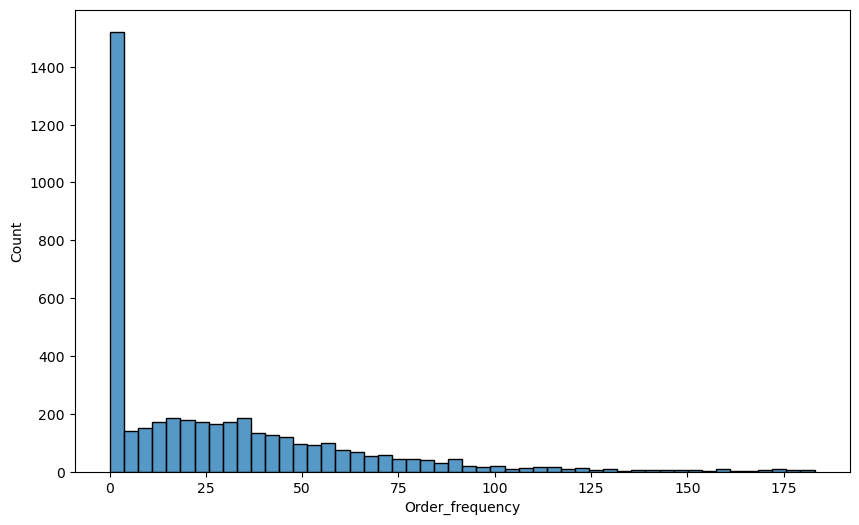

In [292]:
plt.figure(figsize = (10,6))
sns.histplot(df_cust['Order_frequency'], bins = 50)
plt.show()

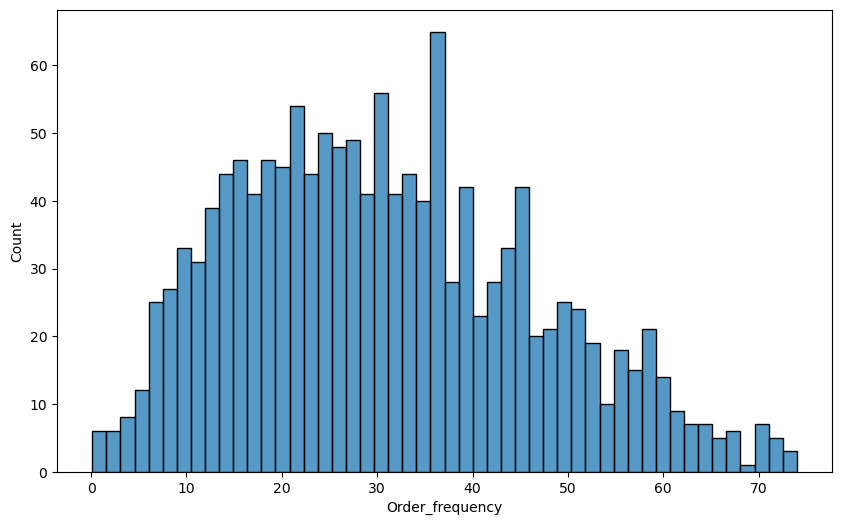

In [293]:
plt.figure(figsize = (10,6))
sns.histplot(df_cust.loc[df_cust.Orders >= 5]['Order_frequency'], bins = 50)
plt.show()

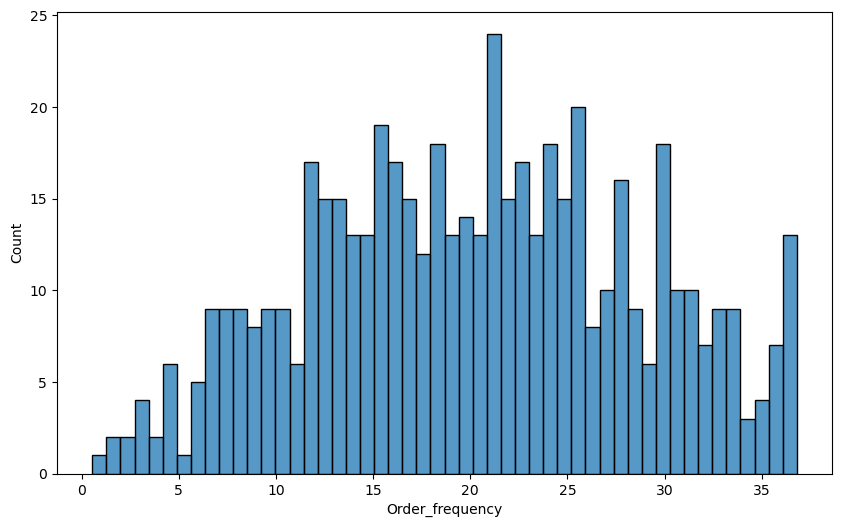

In [294]:
plt.figure(figsize = (10,6))
sns.histplot(df_cust.loc[df_cust.Orders >= 10]['Order_frequency'], bins = 50)
plt.show()

In [295]:
df_cancelled = df.loc[df.InvoiceNo.str[0] == 'C']
df_cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,year,month,month_num,day,weekday,weekday_num,time,time_bin
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2010,Dec,12,1,Wednesday,3,09:41,08:00-10:00
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2010,Dec,12,1,Wednesday,3,09:49,08:00-10:00
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2010,Dec,12,1,Wednesday,3,10:24,10:00-12:00
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,Dec,12,1,Wednesday,3,10:24,10:00-12:00
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,Dec,12,1,Wednesday,3,10:24,10:00-12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,2011,Dec,12,9,Friday,5,09:57,08:00-10:00
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,2011,Dec,12,9,Friday,5,10:28,10:00-12:00
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,2011,Dec,12,9,Friday,5,11:57,10:00-12:00
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,2011,Dec,12,9,Friday,5,11:58,10:00-12:00


In [296]:
df_successful = df.loc[df.InvoiceNo.str[0] != 'C']
df_successful

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,year,month,month_num,day,weekday,weekday_num,time,time_bin
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,Dec,12,1,Wednesday,3,08:26,08:00-10:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,Dec,12,1,Wednesday,3,08:26,08:00-10:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,Dec,12,1,Wednesday,3,08:26,08:00-10:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,Dec,12,1,Wednesday,3,08:26,08:00-10:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,Dec,12,1,Wednesday,3,08:26,08:00-10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,Dec,12,9,Friday,5,12:50,12:00-14:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,Dec,12,9,Friday,5,12:50,12:00-14:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,Dec,12,9,Friday,5,12:50,12:00-14:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,Dec,12,9,Friday,5,12:50,12:00-14:00


In [297]:
cancelled_orders = len(df_cancelled['InvoiceNo'].unique())
successful_orders = len(df_successful['InvoiceNo'].unique())
print(f"The percentage of orders that have been cancelled is {cancelled_orders/successful_orders*100:.2f}%")

The percentage of orders that have been cancelled is 19.22%


In [298]:
df_prod = df_cancelled['Description'].value_counts()
df_prod = df_prod.reset_index().rename(columns = {'Description' : 'Cancellations', 'index' : 'Product'})
df_prod

,Product,Cancellations
0,Manual,244
1,REGENCY CAKESTAND 3 TIER,181
2,POSTAGE,126
3,JAM MAKING SET WITH JARS,87
4,Discount,77
...,...,...
1967,RETRO LONGBOARD IRONING BOARD COVER,1
1968,DOLLY GIRL CHILDRENS EGG CUP,1
1969,ENGLISH ROSE NOTEBOOK A7 SIZE,1
1970,PINK SMALL JEWELLED PHOTOFRAME,1


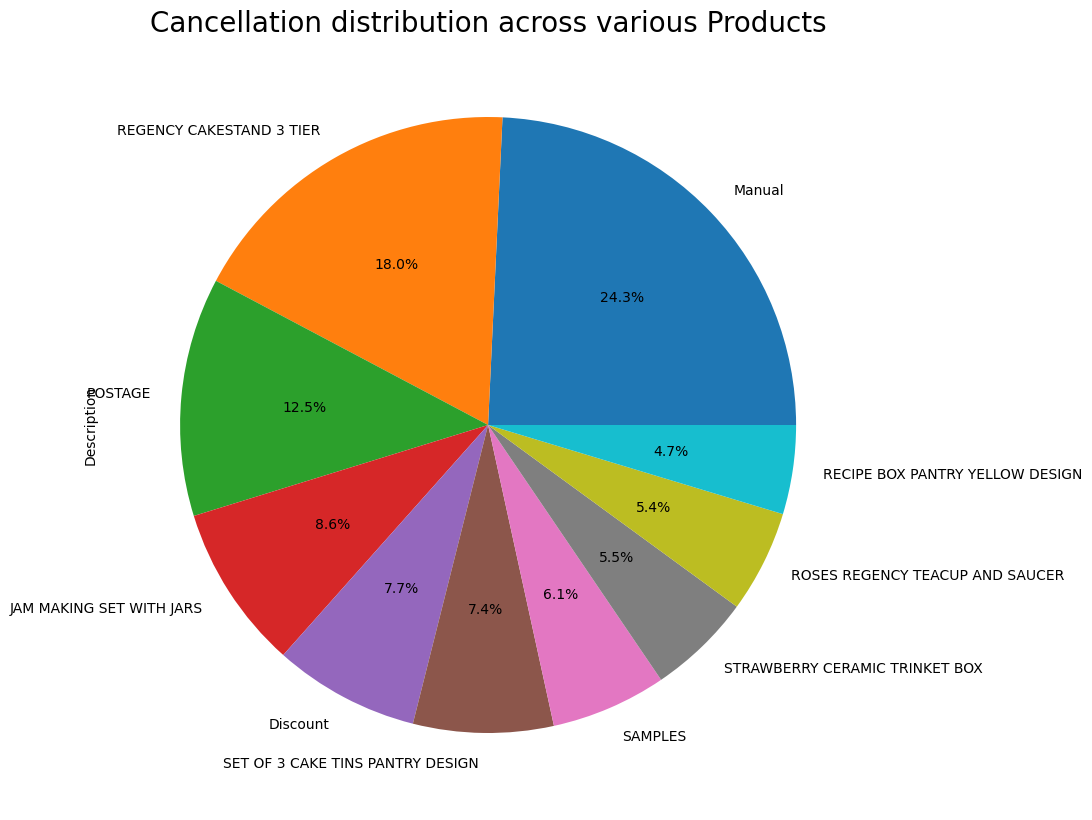

In [299]:
plt.figure(figsize = (10,10))
df_cancelled['Description'].value_counts()[:10].plot(kind='pie', autopct='%1.1f%%')
plt.title('Cancellation distribution across various Products', fontsize = 20)
plt.show()

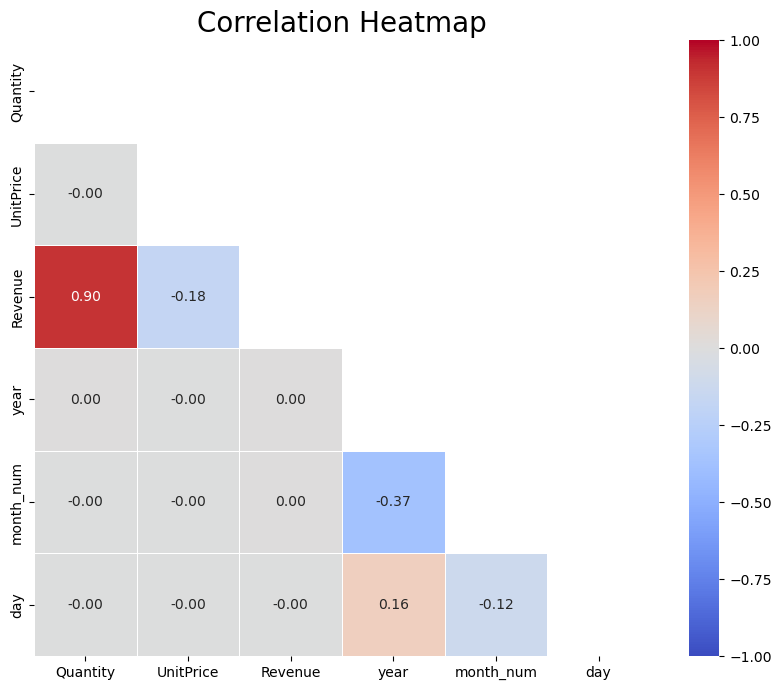

In [300]:
plt.figure(figsize=(10, 8))

corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, annot=True, fmt=".2f")

plt.title('Correlation Heatmap', fontsize = 20)
plt.show()


In [302]:
def recency_cerrection(recency):
    ans = str(recency).split(' ')[0]
    return(int(ans))

In [312]:
today = df['InvoiceDate'].max()
today

df['rank'] = df.sort_values(['CustomerID','InvoiceDate']).groupby(['CustomerID'])['InvoiceDate'].rank(method='min').astype(int)

df_cr = df[df['rank'] == 1]
df_cr['recency'] = pd.to_datetime('2011-12-10') - pd.to_datetime(df_cr['InvoiceDate'])

df_cr['recency'] = df_cr['recency'].apply(recency_cerrection)

df_cr = df_cr[['CustomerID','recency']]
df_cr = df_cr.drop_duplicates()
df_cr.head()

C:\Users\karni\AppData\Local\Temp\ipykernel_21220\2131881836.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cr['recency'] = pd.to_datetime('2011-12-10') - pd.to_datetime(df_cr['InvoiceDate'])
C:\Users\karni\AppData\Local\Temp\ipykernel_21220\2131881836.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cr['recency'] = df_cr['recency'].apply(recency_cerrection)


,CustomerID,recency
0,17850.0,373
9,13047.0,373
26,12583.0,373
46,13748.0,373
65,15100.0,373


In [308]:
df_cm = df.groupby('CustomerID')['Revenue'].sum()
df_cm = pd.DataFrame(df_cm).reset_index()
df_cm.head()

,CustomerID,Revenue
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [311]:
df_cf = df_cust[['CustomerID','Order_frequency']]
df_cf

,CustomerID,Order_frequency
0,17850.0,2.028571
1,13047.0,19.000000
2,12583.0,20.611111
3,13748.0,55.600000
4,15100.0,7.166667
...,...,...
4366,13436.0,1.000000
4367,15520.0,1.000000
4368,13298.0,1.000000
4369,14569.0,1.000000


In [316]:
df_rfm = df_cr.merge(df_cf, on = 'CustomerID').merge(df_cm, on = 'CustomerID').rename(columns = {'Order_frequency' : 'frequency', 'Revenue' : 'monetary'})
df_rfm = df_rfm.sort_values(by = 'CustomerID')
df_rfm

,CustomerID,recency,frequency,monetary
1169,12346.0,325,0.500000,0.00
438,12347.0,367,52.142857,4310.00
873,12348.0,358,70.750000,1797.24
4238,12349.0,18,1.000000,1757.55
1419,12350.0,310,1.000000,334.40
...,...,...,...,...
1837,18280.0,277,1.000000,180.60
2855,18281.0,180,1.000000,80.82
3233,18282.0,126,39.666667,176.60
988,18283.0,337,20.875000,2094.88


In [326]:
def get_group(Q1, Q2, Q3, value):
    if value <= Q1:
        return '1'
    elif Q1 < value <= Q2:
        return '2'
    elif Q2 < value <= Q3:
        return '3'
    elif Q3 < value:
        return '4'

In [319]:
freq_Q1, freq_Q2, freq_Q3 = df_rfm['frequency'].quantile([0.25,0.5,0.75])
rece_Q1, rece_Q2, rece_Q3 = df_rfm['recency'].quantile([0.25,0.5,0.75])
mone_Q1, mone_Q2, mone_Q3 = df_rfm['monetary'].quantile([0.25,0.5,0.75])

freq_group = []
for i in range(len(df_rfm)):
    freq = df_rfm.iloc[i]['frequency']
    freq_group.append(get_group(freq_Q1, freq_Q2, freq_Q3, freq)) 

df_rfm['freq_group'] = freq_group

monetary_group = []
for i in range(len(df_rfm)):
    monetary = df_rfm.iloc[i]['monetary']
    monetary_group.append(get_group(mone_Q1, mone_Q2, mone_Q3, monetary)) 

df_rfm['monetary_group'] = monetary_group

recency_group = []
for i in range(len(df_rfm)):
    recency = df_rfm.iloc[i]['recency']
    recency_group.append(get_group(rece_Q1, rece_Q2, rece_Q3, recency)) 

df_rfm['recency_group'] = recency_group

df_rfm.head()

,CustomerID,recency,frequency,monetary,freq_group,monetary_group,recency_group
1169,12346.0,325,0.500000,0.00,1,1,3
438,12347.0,367,52.142857,4310.00,4,4,4
873,12348.0,358,70.750000,1797.24,4,4,4
4238,12349.0,18,1.000000,1757.55,1,4,1
1419,12350.0,310,1.000000,334.40,1,2,3


In [320]:
df_rfm['rfm'] = df_rfm['recency_group'] + df_rfm['freq_group'] + df_rfm['monetary_group']
df_rfm.head()

,CustomerID,recency,frequency,monetary,freq_group,monetary_group,recency_group,rfm
1169,12346.0,325,0.500000,0.00,1,1,3,311
438,12347.0,367,52.142857,4310.00,4,4,4,444
873,12348.0,358,70.750000,1797.24,4,4,4,444
4238,12349.0,18,1.000000,1757.55,1,4,1,114
1419,12350.0,310,1.000000,334.40,1,2,3,312


In [324]:
def get_segment(rfm):
    if rfm == '144':
        return 'Best'
    elif rfm == '344':
        return 'Almost Lost'
    elif rfm == '444':
        return 'Lost Big Spenders'
    elif rfm == '441':
        return 'Lost Cheap'
    elif rfm[1] == '4':
        return 'Loyal'
    elif rfm[2] == '4':
        return 'Big Spenders'
    else:
        return 'Normal'

In [325]:
df_rfm['Segment'] = df_rfm['rfm'].apply(get_segment)
df_rfm.head()

,CustomerID,recency,frequency,monetary,freq_group,monetary_group,recency_group,rfm,Segment
1169,12346.0,325,0.500000,0.00,1,1,3,311,Normal
438,12347.0,367,52.142857,4310.00,4,4,4,444,Lost Big Spenders
873,12348.0,358,70.750000,1797.24,4,4,4,444,Lost Big Spenders
4238,12349.0,18,1.000000,1757.55,1,4,1,114,Big Spenders
1419,12350.0,310,1.000000,334.40,1,2,3,312,Normal


In [327]:
df_cust_seg = df_rfm[['CustomerID','Segment']]
df_cust_seg.head()

,CustomerID,Segment
1169,12346.0,Normal
438,12347.0,Lost Big Spenders
873,12348.0,Lost Big Spenders
4238,12349.0,Big Spenders
1419,12350.0,Normal


In [328]:
segment_group = df_cust_seg.groupby('Segment').count()
segment_group = segment_group.reset_index()
segment_group.columns = ['Segment', 'Count']
segment_group.head()

,Segment,Count
0,Almost Lost,82
1,Big Spenders,877
2,Lost Big Spenders,108
3,Lost Cheap,39
4,Loyal,862


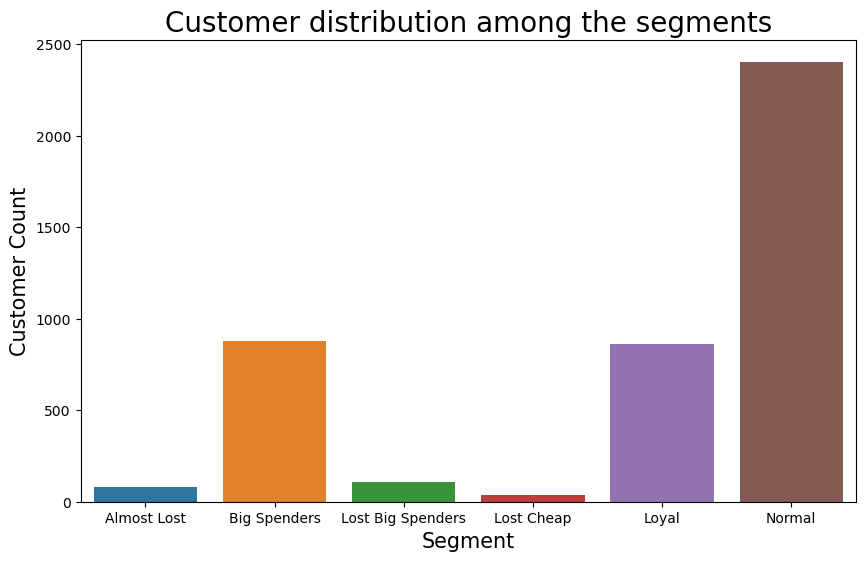

In [353]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Segment', y = 'Count', data = segment_group)
plt.title('Customer distribution among the segments', fontsize = 20)
plt.xlabel('Segment', fontsize = 15)
plt.ylabel('Customer Count', fontsize = 15)
plt.show()